<a href="https://colab.research.google.com/github/cleysonl/ML_Bootcamp_CLL/blob/master/ML_bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Data Collection**

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import tensorflow as tf

print(tf.__version__)
print(tf.test.is_gpu_available())
#The last command will be deprecated so better to use the following command to check the GPU availability
print(tf.config.list_physical_devices('GPU'))

2.1.0-rc1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [0]:
# imutils library use to import the dataset from a url
from imutils import paths
# tqdm used to show progress in an operation (e.g. moving images to train and test sets)
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random
#library used to copy the images to the directories train and test
import shutil
# to resize the images
import cv2
import os

In [5]:
# Get the flowers-17 dataset
flowers = tf.keras.utils.get_file('flower_photos',
                                  'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                  untar=True)

228818944/228813984 [==============================] - 2s 0us/step


In [6]:
# check the directory and the folders/labels of the dataset
!ls {flowers}

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [7]:
# Give me the length of the list of paths.list_images in the directory flowers
total_data = len(list(paths.list_images(flowers)))
total_data

3670

In [8]:
# list of paths.list_images
image_paths = list(paths.list_images(flowers))
# show the first 5 paths from the list
image_paths[:5]

['/root/.keras/datasets/flower_photos/roses/5182167964_9d1a0be0b8_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/2423565102_2f1a00bb1b_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/8524505868_236f4c94b5.jpg',
 '/root/.keras/datasets/flower_photos/roses/4951581805_b049304f1b_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/20409866779_ac473f55e0_m.jpg']

In [9]:
# shuffle the image paths and preview
random.shuffle(image_paths)
image_paths[:5]

['/root/.keras/datasets/flower_photos/roses/527513005_41497ca4dc.jpg',
 '/root/.keras/datasets/flower_photos/dandelion/3554435478_1a7ab743e9_n.jpg',
 '/root/.keras/datasets/flower_photos/tulips/8838983024_5c1a767878_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/21522100663_455b77a90c_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/12572786553_634868f7f2_n.jpg']

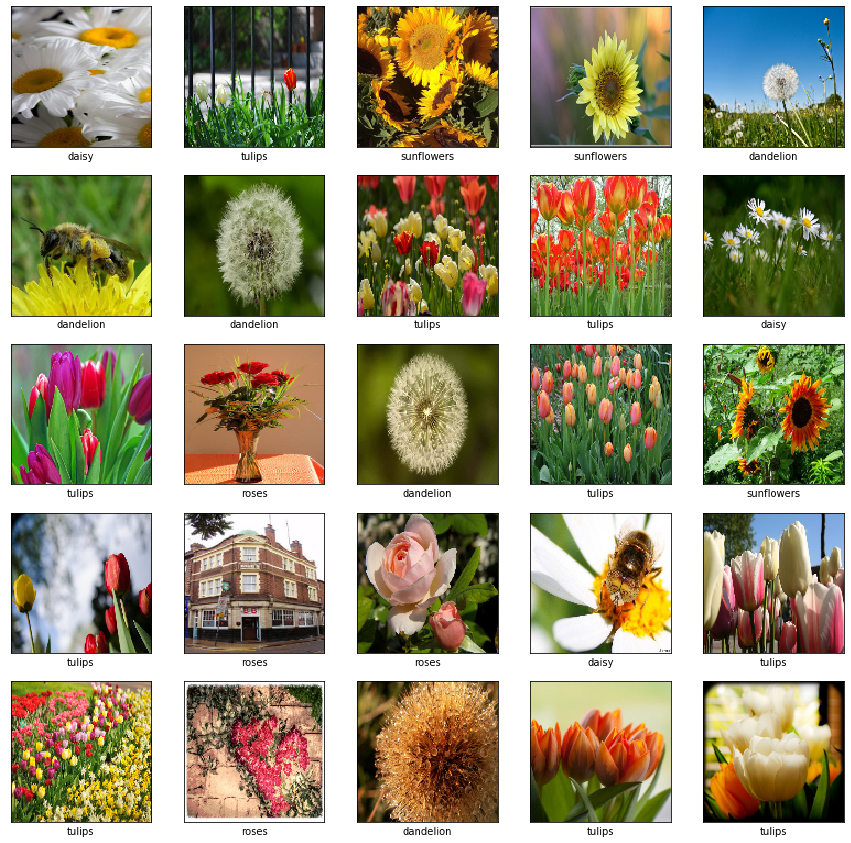

In [10]:
# size of the figure i want to print
plt.figure(figsize=(15,15))
# number of images I want to plot 25
for i in range(25):
  # choose a random path from the list image_paths
  image_path = np.random.choice(image_paths)
  #read the image paths
  image = plt.imread(image_path)
  #resize
  image = cv2.resize(image, (128, 128))
  # obtaing the label from the path
  label = image_path.split("/")[5]
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  # show image
  plt.imshow(image)
  plt.xlabel(label)
plt.show()

In [0]:
# Split images in train and test
nb_test_images = int(len(list(paths.list_images(flowers)))*0.15)
nb_train_images = len(list(paths.list_images(flowers))) - nb_test_images

In [0]:
# directory paths
train_dir = "train"
test_dir = "test"

In [0]:
# Function to move the images to their corresponding directory
def move_images(nb_images, output_dir):
  for i in tqdm(range(nb_images)):
    #grab an image from the image_paths list and the label of the image
    image_path = image_paths[i]
    label = image_path.split("/")[5]

    new_image_dir = os.path.join(output_dir, label)
    if not os.path.exists(new_image_dir):
      os.makedirs(new_image_dir)
    
    #copy the current image to the respective folder including the metadata
    shutil.copy2(image_path, new_image_dir)

In [14]:
# move the images to the train and test set
move_images(nb_test_images, test_dir)
move_images(nb_train_images, train_dir)

100%|██████████| 3120/3120 [00:00<00:00, 3998.52it/s]


In [15]:
# to check the files in each directory
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (34.7 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: 

In [16]:
!tree --dirsfirst --filelimit 10 train

train
├── daisy [537 entries exceeds filelimit, not opening dir]
├── dandelion [755 entries exceeds filelimit, not opening dir]
├── roses [557 entries exceeds filelimit, not opening dir]
├── sunflowers [593 entries exceeds filelimit, not opening dir]
└── tulips [678 entries exceeds filelimit, not opening dir]

5 directories, 0 files


In [17]:
!tree --dirsfirst --filelimit 10 test

test
├── daisy [92 entries exceeds filelimit, not opening dir]
├── dandelion [130 entries exceeds filelimit, not opening dir]
├── roses [106 entries exceeds filelimit, not opening dir]
├── sunflowers [115 entries exceeds filelimit, not opening dir]
└── tulips [107 entries exceeds filelimit, not opening dir]

5 directories, 0 files


#**2. Data Preparation**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# Initialize the data augmentation object
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                          rotation_range=15,
                                                          horizontal_flip=True,
                                                          vertical_flip=False)

In [0]:
#select an image from the training set randomly
train_images = list(paths.list_images("train")) 
sample_image = np.random.choice(train_images)

#Load the image, resize it, and add a batch dimension
sample_image = plt.imread(sample_image)
sample_image = cv2.resize(sample_image, (224,224))
sample_image = np.expand_dims(sample_image, axis=0)

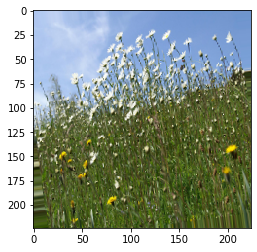

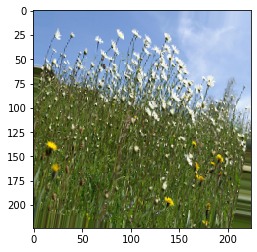

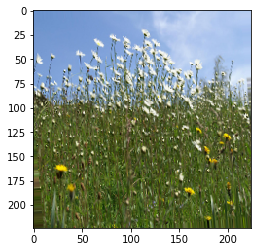

In [22]:
#construct the generator and initialize the total number of images
image_aug = img_gen.flow(sample_image, batch_size=1)
total = 0

#loop over examples from our image data augmentation generator
for image in image_aug:
  #increment our counter
  plt.imshow(np.squeeze(image, axis=0))
  plt.show()
  total += 1
  # if we have reached 3 examples, break from the loop
  if total ==3:
    break

In [23]:
# construct the training data generator and verify the shapes
train_gen = img_gen.flow_from_directory("train",
                                        class_mode = "categorical",
                                        target_size = (224,224),
                                        color_mode="rgb",
                                        shuffle=True)
images, labels = next(train_gen)
images.shape, labels.shape

Found 3120 images belonging to 5 classes.


((32, 224, 224, 3), (32, 5))